# Visualising `Network`

In [1]:
# read sample network
from genet import Network
import os

n = Network('epsg:27700')
path_to_matsim_network = '../example_data/pt2matsim_network'
n.read_matsim_network(os.path.join(path_to_matsim_network, 'network.xml'))
n.read_matsim_schedule(os.path.join(path_to_matsim_network, 'schedule.xml'))
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 
Schedule info: Schedule:
Number of services: 9
Number of unique routes: 68
Number of stops: 45


## Basic plots

Each GeNet class has a `plot` method.

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


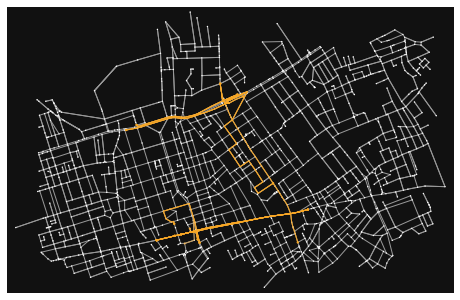

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113294be0>)

In [2]:
n.plot()

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


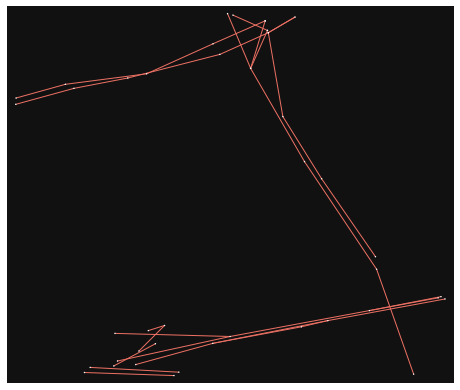

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11699d1f0>)

In [3]:
n.schedule.plot()

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


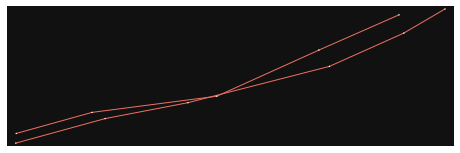

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1169b45e0>)

In [4]:
n.schedule['12430'].plot()

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


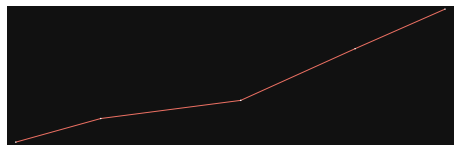

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116cc08b0>)

In [5]:
n.schedule.route('VJ948e8caa0f08b9c6bf6330927893942c474b5100').plot()

GeNet `Network` can an additional two methods to 
- just plot the underlying graph and 
- to plot the un-routed schedule on top of the graph

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


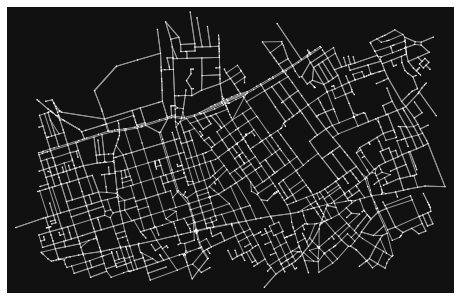

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114651460>)

In [6]:
n.plot_graph()

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


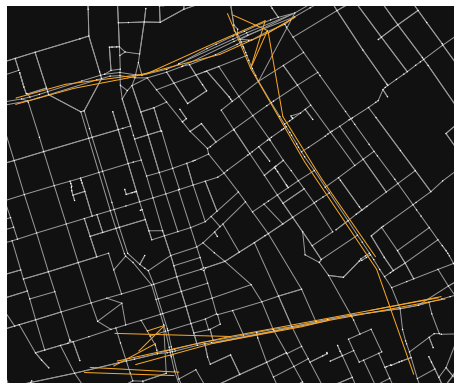

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117054ca0>)

In [7]:
n.plot_schedule()

## Standard Outputs

You can generate a long list of outputs which are useful for validating and visualising the network and its schedule. 

Specifying `gtfs_day` is optional and only useful for generating visualisations which don't rise eyebrows.
In this bundle you get a number of outputs which you can drop into [kepler.gl](https://kepler.gl/) or qgis:

- network graph related
    - geojsons for car mode featuring 'freespeed', 'capacity', 'permlanes' (separately, because these can get large)
    - geojsons for all other modal subgraphs
- schedule related
    - geojsons and shapefiles featuring schedule graph with vehicles per hour for every mode separately and all together (with 
    mode data present) in the schedule for all hours of the day, this can be used within kepler to animate across
    hours of the day. (Use 'filter' option on 'hour' field and click on the little clock)
    - the same as above for all modes together but subsetted for am/inter/pm peak within hours 7, 8, 9, 13, 16, 17, 
    18 for convenience (in case the big geojson may be too large to load in kepler)
    - png bar plots for vehicles per hour per:
        - PT service
        - PT stop
        (titles and file names include modes and human readable names for stops and services if present)

You can also generate standard outputs for schedule only: